# Root-Finding Methods for High Degree Equations

## Table of Contents

- [i. Simple Iteration Method](#simple-iteration-method)
- [ii. Newton-Raphson Method](#newton-raphson-method)
- [iii. Bisection Method](#bisection-method)
- [iv. SciPy Functions](#scipy-functions)

## Simple Iteration Method <a id="simple-iteration-method"></a>

The simple iterations method can be used for finding roots of high-degree equations, but the choice of function g(x) is crucial for convergence. Here are some key points to keep in mind:

* The simple iterations method involves repeatedly applying a fixed formula to an initial guess until a desired *level of accuracy* is achieved.

* For high-degree equations, it may be difficult to find a suitable function g(x) that satisfies the sufficient condition for convergence **|g'(x)| < 1** for all x in the domain of interest.

* In practice, it may be necessary to try multiple functions and initial guesses to find a combination that works.

* Other numerical methods such as Newton's method or the bisection method are generally more efficient and can converge to a solution in fewer iterations than the simple iterations method.

* However, these methods also require more computations per iteration and may be more sensitive to the choice of initial guess.

* The simple iterations method can be useful as a starting point for finding roots of high-degree equations, but more advanced methods may be necessary for faster and more reliable convergence.

```
Inputs:

    A function f(x)
    A function g(x) such that x = g(x) can be rearranged from f(x) = 0
    An initial guess x0
    A tolerance level tol

Outputs:

    An approximation of the root of f(x) = 0
```

Algorithm:

    1- Rearrange the equation so that the variable is put on the left side
    2- Assume (guess) an initial value of the variable to start the first iteration
    3- Substitute the value of the variable in the right side of the equation and calculate an new value for the variable
    4- If the new value of the variable is not equal to the previous value, consider the new one as the value of the variable.
    5- Repeat steps 3 and 4 until the new value is equal to the old value of the variable.
    6- In case the new value does not approach the old value (difference increases at each iteration) stop calculation and try another initial value or another rearrangement of the given equation.

```py
    1. Set i = 0 and xi = x0
    2. Repeat the following steps until |xi+1 - xi| < tol:
        2a. Set xi+1 = g(xi)
        2b. Set i = i + 1
    3. Return xi+1 as an approximation of the root of f(x) = 0
```

In [94]:
from math import * 
# Equation: x^2 - 3x + 1 = 0

y = lambda x: x**2 - 3*x + 2 
g1 = lambda x: (x**2 + 2)/3
g2 = lambda x: sqrt(3*x - 2)

### Implementation with for loop

In [213]:
# Set the tolerance and initial guess for the root
tol = 1.0E-6
x_init = -12

# Try to estimate the root using the g1 function
try:    
    for i in range(100):
        # Calculate the new value of x
        x_new = g1(x_init)

        # Check if the new value is within the desired tolerance
        if abs(x_new - x_init) < tol:
            break 

        # Update the initial guess with the new value
        x_init = x_new

    # Print the number of iterations, the estimated root, and the name of the function used
    print(f'iterations: {i+1}', 'root:', round(x_new, 5), 'func: g1')
    
# If an overflow error occurs, try to estimate the root using the g2 function
except OverflowError:
    for i in range(100):
        # Calculate the new value of x
        x_new = g2(x_init)

        # Check if the new value is within the desired tolerance
        if abs(x_new - x_init) < tol:
            break 

        # Update the initial guess with the new value
        x_init = x_new

    # Print the number of iterations, the estimated root, and the name of the function used
    print(f'iterations: {i+1},', 'root:', f'{round(x_new, 5)},', 'func: g2')

iterations: 54, root: 2.0, func: g2


### Implemetation with while loop

In [157]:
# Set the tolerance, initial guess for the root, and an initial value for x_new
tol = 1.0E-6
x_init = 1
x_new = 1.2
c = 0

# Perform the fixed-point iteration until the desired tolerance is reached
while abs(x_new - x_init) >= tol:
    # Update the initial guess with the previous value of x_new
    x_init = x_new

    # Calculate the new value of x_new using the g1 function
    x_new = g1(x_init)

    # Increment the iteration counter
    c += 1
    
# Print the number of iterations, the estimated root, and the name of the function used
print(f'iterations: {c},', 'root:', f'{round(x_new, 5)},', 'func: g1')

iterations: 30, root: 1.0, func: g1


#### Convergence Diagram

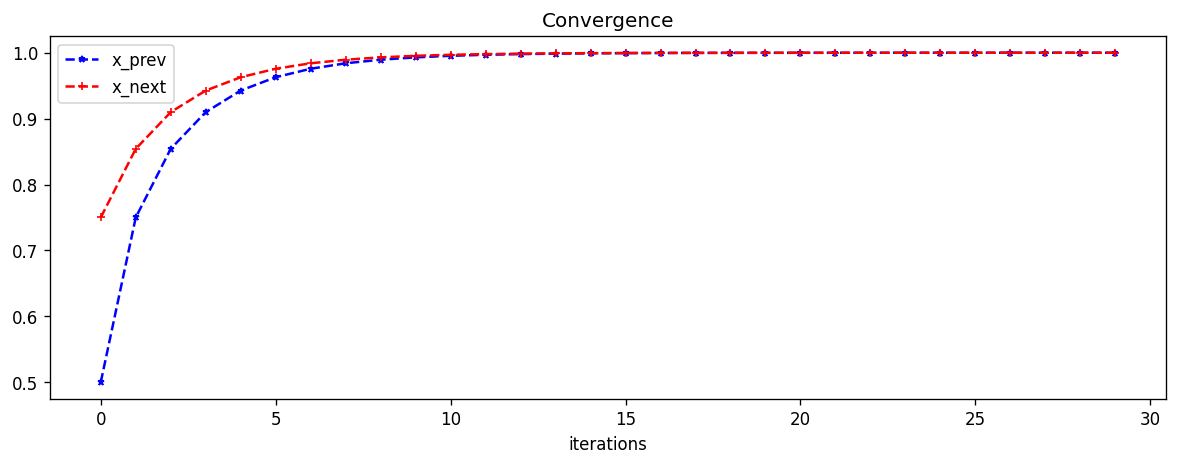

In [198]:
import matplotlib.pyplot as plt

x_next = []
x_prev = []

tol = 1.0E-6
x_init = 1
x_new = .5
c = 0

while abs(x_new - x_init) >= tol:
    x_init = x_new
    x_prev.append(x_init)
    
    x_new = g1(x_init)
    x_next.append(x_new)
    
    c += 1
    
# print(f'iterations: {c},', 'root:', f'{round(x_new, 5)},', 'func: g1')

plt.figure(figsize=(12,4), dpi=120)
plt.title('Convergence')
plt.xlabel('iterations')
plt.plot(range(c), x_prev, '*--b', ms=4, label='x_prev')
plt.plot(range(c), x_next, '+--r', ms=5, label='x_next')
plt.legend(loc=0);

------

## Newton-Raphson Method <a id="newton-raphson-method"></a>

The **Newton-Raphson method** is an iterative technique for finding the roots of a function. It is also known as the *Newton's method* or the *Newton-Raphson iteration*. The method is based on using the *first derivative* of the function to iteratively refine an initial guess for the root. The basic idea is to use the tangent line to the function at the current guess to find a better guess for the root. The method can *converge very quickly* for well-behaved functions but may fail to converge for certain functions or initial guesses.

Here are some key points about the Newton-Raphson method:

- The method uses the **first derivative** of the function to iteratively refine the initial guess for the root.
- The formula for the iteration is $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$, where $x_n$ is the current guess for the root, $f(x_n)$ is the function value at $x_n$, and $f'(x_n)$ is the derivative of the function at $x_n$.
- The method requires an initial guess for the root, which should be chosen carefully to ensure convergence.
- The method can converge very quickly for well-behaved functions but may fail to converge for certain functions or initial guesses.
- The Newton-Raphson method is a popular technique for finding roots of functions in numerical analysis and scientific computing.

Algorithm:

    
    1. Choose an initial guess x_0 for the root of the function f(x).
    2. Compute the function value f(x_0) and the derivative f'(x_0) at the initial guess.
    3. Calculate the next guess x_1 using the formula x_1 = x_0 - f(x_0)/f'(x_0).
    4. If the difference between x_1 and x_0 is less than a specified tolerance, stop and return x_1 as the estimated root.
    5. Set x_0 = x_1 and go back to step 2.


### Implementation

In [274]:
import sympy

# Define the equation symbolically
x = sympy.Symbol('x')
y = x**2 - 3*x + 2
y_prime = y.diff(x)

def newton_root(y, tol=1.0E-6, x_init=[0]):
    
    x = sympy.Symbol('x')
    y = y
    y_prime = y.diff(x)
    
    for x_i in x_init:
        x_initial = x_i
        
        # Check if the derivative is zero at the initial guess
        if y_prime.subs(x, x_i) == 0:
            print(f"The derivative is zero at x = {x_i}. Skipping this initial guess.")
            continue
        
        # Perform root estimation using the Newton-Raphson method
        for i in range(100):
            # Calculate the new value of x using the Newton-Raphson formula
            x_new = x_i - (y.subs(x, x_i) / y_prime.subs(x, x_i))

            # Check if the new value is within the desired tolerance
            if abs(x_new - x_i) < tol:
                # If within the tolerance, print the estimated root and number of iterations
                print(f'iterations: {i+1},', 'root:', f'{round(x_new, 5)},', f'initial guess: {x_initial}')        
                break

            # Update the initial guess with the new value
            x_i = x_new

newton_root( x**2 - 3*x + 2 , x_init=[-1, 0, 1.5, 1.7, 2.5])

iterations: 7, root: 1.00000000000000, initial guess: -1
iterations: 6, root: 1.00000000000000, initial guess: 0
The derivative is zero at x = 1.5. Skipping this initial guess.
iterations: 6, root: 2.00000000000000, initial guess: 1.7
iterations: 5, root: 2.00000000000000, initial guess: 2.5


Faster Cenvergence!

------

## Bisection Method <a id="bisection-method"></a>

The **bisection method** is a simple numerical method for finding the root of a function. The method works by repeatedly *bisecting an interval* that contains the root, and then selecting the subinterval in which the root must lie, based on the *intermediate value theorem*. The process is repeated until the desired level of accuracy is achieved.

Here are some properties of the bisection method:

* The method is *guaranteed to converge* to a root, provided that the *function is continuous* and *changes sign* over the interval.
* The rate of convergence is very *slow*, typically linear, meaning that the number of iterations required to achieve a given level of accuracy grows linearly with the size of the interval.
* The method is very *robust* and can handle functions that are oscillatory or have multiple roots.
* The method is very *simple to implement* and requires only basic arithmetic operations.
* The method is conservative in its use of information, since it only uses the sign of the function at the midpoint of the interval, and does not make use of any derivative information. This makes it *well-suited for functions that are expensive to compute* or for which the *derivative is not available*.


Algorithm:


    1. Check that f(a) and f(b) have opposite signs. If they do not, return an error message and stop.
    2. Set c = (a + b) / 2.
    3. If f(c) = 0 or (b - a) / 2 < tol, then return c as the root.
    4. If f(a) and f(c) have opposite signs, set b = c. Otherwise, set a = c.
    5. Repeat from step 2.


### Implementation

In [310]:
def bisection_root(y, a, b, tol=1.0E-6):
    """
    Compute the root of a function using the bisection method.

    Parameters:
    y (function): A continuous function.
    a (float): The left endpoint of the interval.
    b (float): The right endpoint of the interval.
    tol (float): The desired level of accuracy. Defaults to 1.0E-6.

    Returns:
    A float approximation to a root of y on the interval [a, b].

    Raises:
    ValueError: If y(a) and y(b) have the same sign or if the maximum number of iterations is exceeded.
    """

    # Check that y(a) and y(b) have opposite signs
    y_a = y(a)
    y_b = y(b)
    if y_a * y_b > 0:
        raise ValueError("y(a) and y(b) must have opposite signs")

    # Set the initial interval and error
    c = (a + b) / 2

    # Repeat until the desired level of accuracy is achieved
    for i in range(100):
        y_c = y(c)

        # Check if the root has been found
        if abs(y_c) < tol:
            return i, round(c, 5)

        # Update the interval
        if y_a * y_c < 0:
            b = c
        else:
            a = c

        # Bisect the interval
        c = (a + b) / 2

    # If the function does not converge within the maximum number of iterations, raise an error
    raise ValueError("Maximum number of iterations exceeded")


# Example usage
y = lambda x: x**2 - 3*x + 2
a = 1.5
b = 2.7
i, root = bisection_root(y, a, b)
print(f"iterations: {i}, Root: {root}")

iterations: 18, Root: 2.0


-----

## SciPy Root finding Functions <a id="scipy-functions"></a>

In [313]:
from scipy.optimize import newton, bisect, fsolve, root

In [312]:
y = lambda x: x**2 - 3*x + 2

In [317]:
newton(y, 5)

1.9999999999999996

In [321]:
bisect(y, 1.1, 2.3)

2.0

In [334]:
print(fsolve(y, [2.5]))

[2.]


In [333]:
root(y, 5)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-7.59392549e-12])
       r: array([-1.00000013])
  status: 1
 success: True
       x: array([2.])